In [1]:
using Revise
using MGVInference

In [2]:
polyfit_model = "../test/test_models/polyfit.jl"
open(polyfit_model, "r") do io
    map(println, readlines(io))
end
include(polyfit_model)

# This file is a part of MGVInference.jl, licensed under the MIT License (MIT).

using Distributions
using Random
using ValueShapes

_x1_grid = [Float64(i)/10 for i in 1:25]
_x2_grid = [Float64(i)/10 + 0.1 for i in 1:15]
_common_grid = sort(vcat(_x1_grid, _x2_grid))

function _mean(x_grid, p)
    p[1]*10 .+ p[2]*40 .* x_grid .+ p[3]*600 .* x_grid.^2 .+ p[4]*80 .* x_grid.^3
end

function model(p)
    dist1 = Product(Normal.(_mean(_x1_grid, p), p[5]^2*60))
    dist2 = Product(Normal.(_mean(_x2_grid, p), p[5]^2*60))
    NamedTupleDist(a=dist1,
                   b=dist2)
end

true_params =  [
 -0.3
 -1.5
 0.2
 -0.5
 0.3]

starting_point = [
  0.2
  0.5
  -0.1
  0.3
 -0.6
]

export model, true_params, starting_point


In [3]:
using Distributions
using Random
using ValueShapes
using LinearAlgebra
using Optim
using Plots

In [4]:
rng = MersenneTwister(1287);

In [5]:
data = rand(rng, model(true_params), 1)[1];

In [6]:
function _mean(x::Vector)
    _mean(_common_grid, x)
end

_mean (generic function with 2 methods)

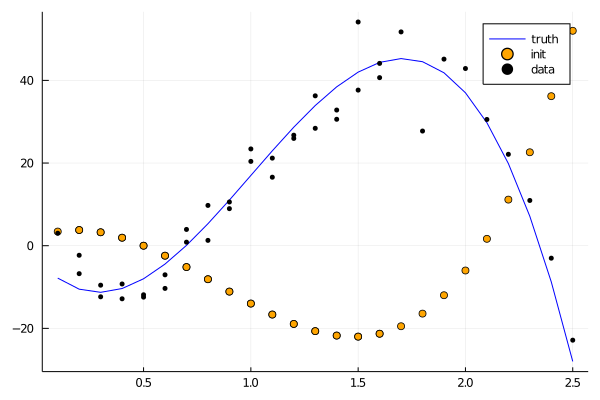

In [7]:
init_plots =() -> let
    truth = _mean(true_params)
    plot!(_common_grid, truth, markercolor=:blue, linecolor=:blue, label="truth")
    scatter!(_common_grid, _mean(starting_point), markercolor=:orange, label="init")
    scatter!(vcat(_x1_grid, _x2_grid), MGVInference.unshaped(data), markercolor=:black, markersize=3, label="data")
end
plot()
init_plots()

In [8]:
first_iteration = mgvi_kl_optimize_step(rng,
                                        model, data,
                                        starting_point;
                                        jacobian_func=FwdRevADJacobianFunc,
                                        residual_sampler=ImplicitResidualSampler,
                                        optim_options=Optim.Options(g_abstol=0.1, g_reltol=1E-2))

display(hcat(first_iteration.result, true_params))

5×2 Array{Float64,2}:
 -0.0876367  -0.3
 -1.07273    -1.5
  0.17561     0.2
 -0.459401   -0.5
  1.23008     0.3

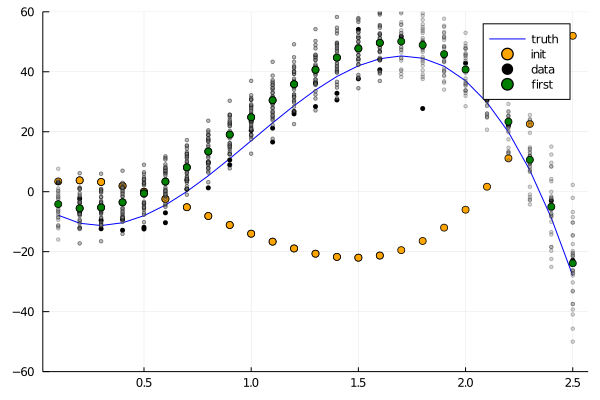

In [9]:
plot_iteration = (params, label) -> let
    #error_mat = mgvi_kl_errors(full_model, params)
    #display(error_mat)
    #errors = sqrt.(error_mat[diagind(error_mat)])
    #yerr = abs.(line(common_grid, params+errors) - line(common_grid, params-errors))
    #scatter!(common_grid, line(common_grid, params), markercolor=:green, label=label, yerr=yerr)
    for sample in eachcol(params.samples)
        scatter!(_common_grid, _mean(Vector(sample)), markercolor=:gray, markeralpha=0.3, markersize=2, label=nothing)
    end
    scatter!(_common_grid, _mean(params.result), markercolor=:green, label=label)
end
    
plot(ylims=(-60,60))
init_plots()
plot_iteration(first_iteration, "first")

In [10]:
plot_iteration_light = (params, counter) -> let
    scatter!(_common_grid, _mean(params.result), markercolor=:green, markersize=3, markeralpha=2*atan(counter/18)/π, label=nothing)
end

#11 (generic function with 1 method)

212.27428650450025

5×2 Array{Float64,2}:
 -0.0876367  -0.3
 -1.07273    -1.5
  0.17561     0.2
 -0.459401   -0.5
  1.23008     0.3

284.49906038865373

5×2 Array{Float64,2}:
 -0.794461   -0.3
 -0.459141   -1.5
  0.0923748   0.2
 -0.245719   -0.5
  2.87001     0.3

270.0303415409678

5×2 Array{Float64,2}:
 -0.0694391  -0.3
 -0.0421706  -1.5
  0.158369    0.2
 -0.442255   -0.5
  2.09862     0.3

247.0281179762525

5×2 Array{Float64,2}:
 -0.335501  -0.3
 -0.411123  -1.5
  0.108      0.2
 -0.326325  -0.5
  1.56541    0.3

264.5179674098519

5×2 Array{Float64,2}:
  0.281027   -0.3
 -0.0453985  -1.5
 -0.034545    0.2
  0.0848445  -0.5
 -2.25486     0.3

272.41517817008804

5×2 Array{Float64,2}:
 -0.265018   -0.3
 -0.454959   -1.5
 -0.0546335   0.2
  0.251443   -0.5
 -2.16924     0.3

236.5354336214561

5×2 Array{Float64,2}:
 -0.564657   -0.3
 -0.819993   -1.5
  0.0904932   0.2
 -0.229901   -0.5
 -1.50562     0.3

664032.9286471053

5×2 Array{Float64,2}:
  0.947483   -0.3
 -0.639742   -1.5
  0.0640897   0.2
 -0.0434581  -0.5
 -0.0134117   0.3

122.99621948130083

5×2 Array{Float64,2}:
  0.210368  -0.3
 -1.7827    -1.5
  0.207574   0.2
 -0.499496  -0.5
 -0.288824   0.3

4794.868828272691

5×2 Array{Float64,2}:
  0.298692  -0.3
 -1.96032   -1.5
  0.219551   0.2
 -0.524866  -0.5
 -0.287343   0.3

36398.4245115601

5×2 Array{Float64,2}:
  0.478347  -0.3
 -2.11373   -1.5
  0.227827   0.2
 -0.538377  -0.5
 -0.16008    0.3

124.79765747002158

5×2 Array{Float64,2}:
  0.197254  -0.3
 -1.76968   -1.5
  0.206924   0.2
 -0.498404  -0.5
 -0.300061   0.3

152.7272488598798

5×2 Array{Float64,2}:
 -0.00216605  -0.3
 -1.63904     -1.5
  0.198654     0.2
 -0.481223    -0.5
 -0.500356     0.3

1050.803210454929

5×2 Array{Float64,2}:
  0.441211  -0.3
 -2.30696   -1.5
  0.245427   0.2
 -0.571137  -0.5
 -0.511383   0.3

1197.472633984065

5×2 Array{Float64,2}:
 -0.54597   -0.3
 -1.02728   -1.5
  0.154873   0.2
 -0.397873  -0.5
 -0.497884   0.3

498.1096404189595

5×2 Array{Float64,2}:
 -0.117789  -0.3
 -1.89336   -1.5
  0.230046   0.2
 -0.558307  -0.5
 -0.47975    0.3

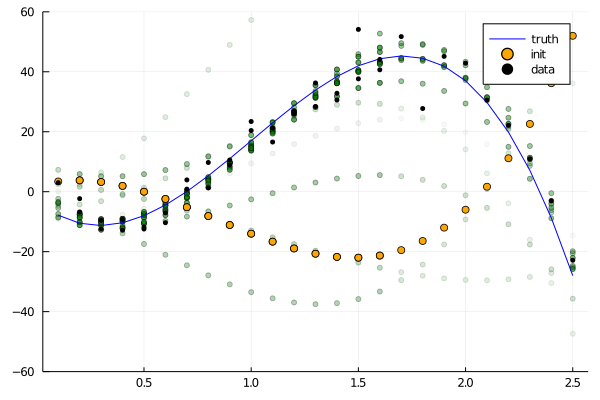

In [11]:
plt = scatter(ylims=(-60,60))
next_iteration = first_iteration
for i in 1:15
    display(minimum(next_iteration.optimized))
    display(hcat(next_iteration.result, true_params))
    next_iteration = mgvi_kl_optimize_step(rng,
                                           model, data,
                                           next_iteration.result;
                                           jacobian_func=FwdRevADJacobianFunc,
                                           residual_sampler=ImplicitResidualSampler,
                                           optim_options=Optim.Options(g_abstol=0.1, g_reltol=1E-2))
    plot_iteration_light(next_iteration, i)
end
display(minimum(next_iteration.optimized))
display(hcat(next_iteration.result, true_params))

init_plots()
display(plt)

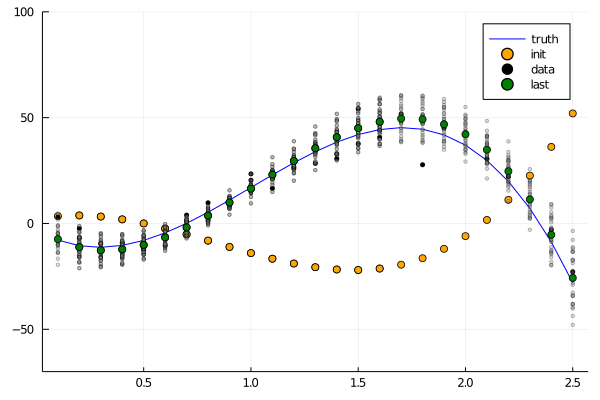

In [12]:
plot(ylims=(-70,100))
init_plots()
plot_iteration(next_iteration, "last")